In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
backend = Aer.get_backend('qasm_simulator')

# Trainability

## 1D, Constant Function

### Generate Data

In [16]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = 0.5*np.ones((n,1))

x = scaler(x, a=0, b=np.pi)

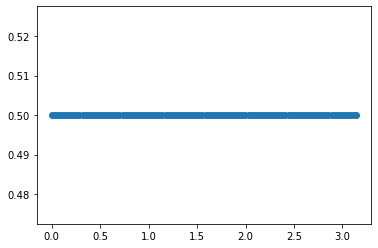

In [17]:
plt.plot(x, y, 'o')
plt.show()

### Training Models

In [9]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)


  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0178221313
epoch: 1, loss: 0.0097063581
epoch: 2, loss: 0.0067131029
epoch: 3, loss: 0.0078419997
epoch: 4, loss: 0.0076362788
epoch: 5, loss: 0.005991938599999999
epoch: 6, loss: 0.0040055114
epoch: 7, loss: 0.0022451054
epoch: 8, loss: 0.0012120905
epoch: 9, loss: 0.0011720341
epoch: 10, loss: 0.0012821748
epoch: 11, loss: 0.0010129587
epoch: 12, loss: 0.0005786793999999999
epoch: 13, loss: 0.0005261932000000002
epoch: 14, loss: 0.0007221189999999999
epoch: 15, loss: 0.0010464685000000002
epoch: 16, loss: 0.0008539471000000001
epoch: 17, loss: 0.00048594059999999996
epoch: 18, loss: 0.00018171320000000005
epoch: 19, loss: 0.0001408177999999999
epoch: 20, loss: 0.0002874044
epoch: 21, loss: 0.00041206389999999993
epoch: 22, loss: 0.00041053840000000003
epoch: 23, loss: 0.0002875575999999999
epoch: 24, loss: 0.00010620120000000001
epoch: 25, loss: 6.0301199999999984e-05
epoch: 26, loss: 0.00011942890000000005
epoch: 27, loss: 0.0002176227999999999
epoch: 28, loss: 0.0

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0813334264
epoch: 1, loss: 0.0546707414
epoch: 2, loss: 0.0312198592
epoch: 3, loss: 0.021252478899999996
epoch: 4, loss: 0.0171411303
epoch: 5, loss: 0.013712524299999999
epoch: 6, loss: 0.0127078114
epoch: 7, loss: 0.013005496600000001
epoch: 8, loss: 0.012627767599999997
epoch: 9, loss: 0.011169496499999997
epoch: 10, loss: 0.008992088
epoch: 11, loss: 0.007351122000000001
epoch: 12, loss: 0.005974871399999999
epoch: 13, loss: 0.005208370199999999
epoch: 14, loss: 0.004743696
epoch: 15, loss: 0.0045519971
epoch: 16, loss: 0.0042605570999999995
epoch: 17, loss: 0.004307673000000001
epoch: 18, loss: 0.0039235046000000015
epoch: 19, loss: 0.0035863454
epoch: 20, loss: 0.0030108192000000006
epoch: 21, loss: 0.0024212284000000002
epoch: 22, loss: 0.0018308598000000003
epoch: 23, loss: 0.0013725313000000003
epoch: 24, loss: 0.0009791660000000003
epoch: 25, loss: 0.0007654168999999999
epoch: 26, loss: 0.0008012596
epoch: 27, loss: 0.0009620305000000002
epoch: 28, loss: 0.

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.019533339799999997
epoch: 1, loss: 0.006491818
epoch: 2, loss: 0.0011216677
epoch: 3, loss: 0.0010344218999999997
epoch: 4, loss: 0.0020965097
epoch: 5, loss: 0.0032170062999999994
epoch: 6, loss: 0.003317531200000001
epoch: 7, loss: 0.0027279555
epoch: 8, loss: 0.0019000301
epoch: 9, loss: 0.0011898713
epoch: 10, loss: 0.0006573495000000002
epoch: 11, loss: 0.00031921780000000006
epoch: 12, loss: 0.00019944770000000008
epoch: 13, loss: 0.0002469127
epoch: 14, loss: 0.0003346180000000001
epoch: 15, loss: 0.00047011550000000007
epoch: 16, loss: 0.0005529999000000002
epoch: 17, loss: 0.0006096982
epoch: 18, loss: 0.0004862517
epoch: 19, loss: 0.0003759732000000001
epoch: 20, loss: 0.00033359139999999997
epoch: 21, loss: 0.00021058070000000006
epoch: 22, loss: 0.0001304719
epoch: 23, loss: 9.125400000000006e-05
epoch: 24, loss: 7.032030000000001e-05
epoch: 25, loss: 5.546839999999996e-05
epoch: 26, loss: 5.326580000000003e-05
epoch: 27, loss: 5.840700000000005e-05
epoch:

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0394932176
epoch: 1, loss: 0.021089391800000003
epoch: 2, loss: 0.015622379100000002
epoch: 3, loss: 0.0133013307
epoch: 4, loss: 0.0107872027
epoch: 5, loss: 0.0088535031
epoch: 6, loss: 0.007459618399999999
epoch: 7, loss: 0.006133488
epoch: 8, loss: 0.0040665226
epoch: 9, loss: 0.0024359032999999998
epoch: 10, loss: 0.0013839469000000001
epoch: 11, loss: 0.0007557642000000001
epoch: 12, loss: 0.0007647717999999999
epoch: 13, loss: 0.0009661070999999999
epoch: 14, loss: 0.0012532996999999998
epoch: 15, loss: 0.0014400346
epoch: 16, loss: 0.0015220752999999996
epoch: 17, loss: 0.0015424466000000007
epoch: 18, loss: 0.0012097434
epoch: 19, loss: 0.0009823335000000001
epoch: 20, loss: 0.0007517861000000002
epoch: 21, loss: 0.0005761583000000001
epoch: 22, loss: 0.0003912677000000002
epoch: 23, loss: 0.00026950780000000005
epoch: 24, loss: 0.00018236289999999991
epoch: 25, loss: 0.00016798009999999993
epoch: 26, loss: 9.19048e-05
epoch: 27, loss: 6.336029999999998e-05
e

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0065278746
epoch: 1, loss: 0.0018993807999999996
epoch: 2, loss: 0.0005474757
epoch: 3, loss: 0.00013934490000000005
epoch: 4, loss: 2.4661400000000028e-05
epoch: 5, loss: 2.820980000000002e-05
epoch: 6, loss: 3.610519999999999e-05
epoch: 7, loss: 4.344770000000004e-05
epoch: 8, loss: 6.94012e-05
epoch: 9, loss: 0.00011822060000000009
epoch: 10, loss: 0.00018988100000000014
epoch: 11, loss: 0.00020064040000000009
epoch: 12, loss: 0.00026695240000000007
epoch: 13, loss: 0.0002673934
epoch: 14, loss: 0.00025250170000000005
epoch: 15, loss: 0.0002915806
epoch: 16, loss: 0.00024993850000000007
epoch: 17, loss: 0.00019071260000000007
epoch: 18, loss: 0.0001506185
epoch: 19, loss: 0.0001047612
epoch: 20, loss: 8.974959999999999e-05
epoch: 21, loss: 8.823380000000002e-05
epoch: 22, loss: 9.898970000000009e-05
epoch: 23, loss: 8.695250000000001e-05
epoch: 24, loss: 6.645189999999996e-05
epoch: 25, loss: 6.82831e-05
epoch: 26, loss: 6.065300000000008e-05
epoch: 27, loss: 3.807

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0008891171000000001
epoch: 1, loss: 0.0005792642999999999
epoch: 2, loss: 0.00025221850000000013
epoch: 3, loss: 0.00022647489999999998
epoch: 4, loss: 8.465249999999998e-05
epoch: 5, loss: 3.620059999999998e-05
epoch: 6, loss: 6.503599999999999e-05
epoch: 7, loss: 0.0001061304
epoch: 8, loss: 0.00013422760000000004
epoch: 9, loss: 0.00011053959999999998
epoch: 10, loss: 7.990769999999997e-05
epoch: 11, loss: 5.042269999999991e-05
epoch: 12, loss: 3.827809999999996e-05
epoch: 13, loss: 4.460840000000002e-05
epoch: 14, loss: 5.942960000000002e-05
epoch: 15, loss: 5.976600000000003e-05
epoch: 16, loss: 4.303100000000001e-05
epoch: 17, loss: 3.234680000000002e-05
epoch: 18, loss: 2.8863299999999985e-05
epoch: 19, loss: 2.4187800000000026e-05
epoch: 20, loss: 2.4041900000000008e-05
epoch: 21, loss: 2.734859999999999e-05
epoch: 22, loss: 3.2732200000000005e-05
epoch: 23, loss: 2.7640399999999977e-05
epoch: 24, loss: 2.9405200000000015e-05
epoch: 25, loss: 3.035389999999997

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.022383091600000002
epoch: 1, loss: 0.0057851753
epoch: 2, loss: 0.0007370993000000002
epoch: 3, loss: 0.0025468299
epoch: 4, loss: 0.0054612905
epoch: 5, loss: 0.005528915499999999
epoch: 6, loss: 0.0038385923
epoch: 7, loss: 0.0022911413
epoch: 8, loss: 0.0019545425
epoch: 9, loss: 0.002224085
epoch: 10, loss: 0.002672538699999999
epoch: 11, loss: 0.0028318395000000002
epoch: 12, loss: 0.0025746097000000005
epoch: 13, loss: 0.002276081
epoch: 14, loss: 0.0019305328999999999
epoch: 15, loss: 0.0014900056
epoch: 16, loss: 0.0012178719000000002
epoch: 17, loss: 0.0012671128999999998
epoch: 18, loss: 0.0015210112000000001
epoch: 19, loss: 0.0017004528
epoch: 20, loss: 0.0017281000999999998
epoch: 21, loss: 0.0015447835999999999
epoch: 22, loss: 0.0013410554
epoch: 23, loss: 0.0010602377000000001
epoch: 24, loss: 0.0008179143000000001
epoch: 25, loss: 0.0008495616000000001
epoch: 26, loss: 0.0008161004
epoch: 27, loss: 0.0008753455999999998
epoch: 28, loss: 0.000903127899

KeyboardInterrupt: 

In [10]:
saver(qnn_list, data_path("trainability_qnn_1D_reps_1_constant"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_2_constant"))

In [18]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 3, 1],
                         lr = 0.1)
    
    dnn.train(x, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_constant"))

## 1D, Gaussian Function

### Generate Data

In [ ]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.02) - gaussian(x, 0.7, 0.02) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)
print(y.shape)

In [ ]:
plt.plot(x, y, 'o')
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_1"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 3, 1],
                         lr = 0.1)
    
    dnn.train(x, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D"))

## 2D function

### Generate Data

In [12]:
np.random.seed(42)

n = 10
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.25, 0.75]])
var1 = np.array([[0.02, 0], [0, 0.02]])

mean2 = np.array([[0.75, 0.25]])
var2 = np.array([[0.02, 0], [0, 0.02]])

mean3 = np.array([[0.25, 0.25]])
var3 = np.array([[0.02, 0], [0, 0.02]])

mean4 = np.array([[0.75, 0.75]])
var4 = np.array([[0.02, 0], [0, 0.02]])

y = gaussian(x, mean1, var1) + gaussian(x, mean2, var2) - gaussian(x, mean3, var3) - gaussian(x, mean4, var4)


x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0, b=1)

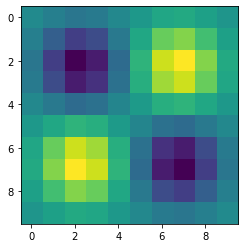

In [13]:
plt.imshow(y.reshape(n,n))
plt.show()

### Training Models

In [5]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [2, 4],
                         dim = [2, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_1"))

  0%|          | 0/10 [00:00<?, ?it/s]

In [6]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [2, 4],
                         dim = [2, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_2"))

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [2, 4],
                         dim = [2, 4, 1],
                         reps = 3,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_3"))

In [14]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 6, 1],
                     lr = 0.1)
    
    dnn.train(x, y, epochs=5000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D"))

## 3D function

### Generate Data

In [ ]:
np.random.seed(42)

n = 5
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)

In [ ]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()
print(y.reshape(n,n,n)[0])

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(1):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_1"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(1):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_2"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(1):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 3,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_3"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(1):
    dnn = sequential_dnn(dim = [3, 10, 10, 1],
                     lr = 0.1)
    
    dnn.train(x, y, epochs=5000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D"))